<a href="https://colab.research.google.com/github/Duwaysan/T5-Week1-Exam/blob/main/Task_(2)_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objective
* The objective of this exercise is to explore and visualize the Traffic Index dataset to gain insights and understand the patterns in the data.

##Dataset Description

| Column Name | Description | Data Type |
| :---------------- | :------: | ----: |
|   City  |   Name of the city	   | Object |
| Datetime           |   Date and time of the data entry	   | Object |
|  TrafficIndexLive    |  Real-time traffic index	   | Int |
|  Jamscount |  Number of traffic jams	   | Int |
|   JamsDelay  |   Total delay caused by traffic jams (in minutes)	   | Float |
|JamsLength           |   Total length of traffic jams (in kilometers)	   | Float |
|  TrafficIndexWeekAgo    |  Traffic index one week ago	   | Int |
|  TravelTimeHistoric |  Historical average travel time (in minutes)	   | Float |
|   TravelTimeLive  |   Real-time travel time (in minutes)	   | Float |


# Tasks

## 1. Exploratory Data Analysis (EDA)

### Perform summary statistics on the dataset.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Task 2/Task_2_Dataset.csv')
df.head()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
0,Abudhabi,2023-07-07 08:01:30,6,4,15.6,0.7,13,59.611918,54.803617
1,Abudhabi,2023-07-07 09:01:30,7,7,20.5,1.7,8,60.221387,56.118629
2,Abudhabi,2023-07-07 10:46:30,7,8,25.0,2.8,6,59.161978,55.518834
3,Abudhabi,2023-07-07 11:16:30,8,11,30.6,5.5,6,59.738138,56.413917
4,Abudhabi,2023-07-07 12:01:30,8,20,62.1,6.5,5,58.958314,56.059246


### Identify and analyze patterns in the data.

In [45]:

cityTraffic = df.groupby('City')['Datetime'].count() #number of traffic per city
cityDelay = df.groupby('City')['JamsDelay'].mean() #average delay per city
#df_1st_3rd = df.query(df['Datetime']>=df['Datetime'].min() & df['Datetime']<='2023-04-16 00:00:00')    trie to divide time traffic/4
print(cityTraffic)
print(cityDelay)

City
Abudhabi    3864
Al-ain      3864
Cairo       8690
Dammam      3864
Doha        8692
Dubai       8690
Jeddah      3864
Kuwait      8691
Mecca       3864
Medina      3864
Riyadh      8692
Name: Datetime, dtype: int64
City
Abudhabi    107.800285
Al-ain       22.606573
Cairo       269.112911
Dammam      123.072516
Doha        127.612057
Dubai       717.264856
Jeddah      182.129322
Kuwait      247.578610
Mecca        42.870885
Medina       36.790761
Riyadh      620.349390
Name: JamsDelay, dtype: float64


### Visualize the distribution of key variables (e.g., Traffic_Index, Date).

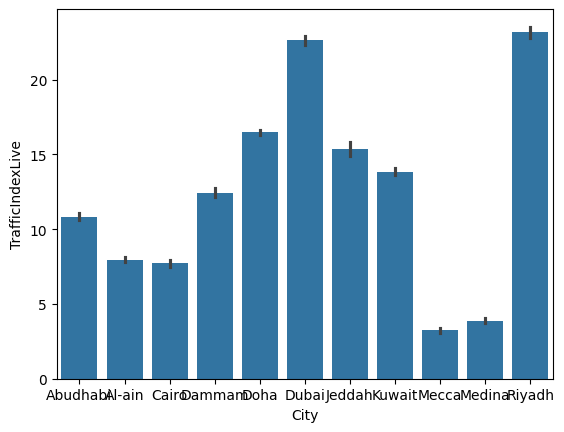

In [50]:
sns.barplot(data = df, x="City", y="TrafficIndexLive")
plt.show() # now we know that economic capitals have mor traffic

### Explore relationships between variables (e.g., Traffic_Index vs. Weather_Condition).


In [46]:
corr_matrix = df[['TrafficIndexLive','JamsCount','JamsDelay','JamsLength','TrafficIndexWeekAgo','TravelTimeHistoric','TravelTimeLive']].corr()
corr_matrix #from correlation matrix we can agree that most of data are affecting live traffic index except travelTimeHistoric and TravelTimeLive


,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
TrafficIndexLive,1.000000,0.876216,0.861349,0.866799,0.903282,0.331072,0.642326
JamsCount,0.876216,1.000000,0.982459,0.952762,0.806545,0.305166,0.566874
JamsDelay,0.861349,0.982459,1.000000,0.962679,0.775028,0.303733,0.571188
JamsLength,0.866799,0.952762,0.962679,1.000000,0.787548,0.306312,0.569065
TrafficIndexWeekAgo,0.903282,0.806545,0.775028,0.787548,1.000000,0.327349,0.573365
TravelTimeHistoric,0.331072,0.305166,0.303733,0.306312,0.327349,1.000000,0.892562
TravelTimeLive,0.642326,0.566874,0.571188,0.569065,0.573365,0.892562,1.000000


## 2. Data Visualization

* Ensure the visualizations are clear and informative.

### Create visualizations to illustrate the findings from the EDA.


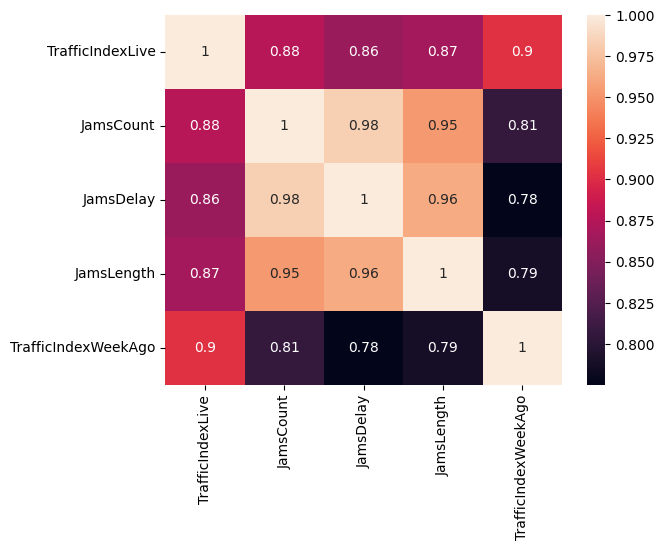

In [47]:
df_heatmap = df.drop(columns=['City','Datetime','TravelTimeLive','TravelTimeHistoric'],inplace=False)
df_heatmap = df_heatmap.corr()
sns.heatmap(df_heatmap, annot=True,)
plt.show()

### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

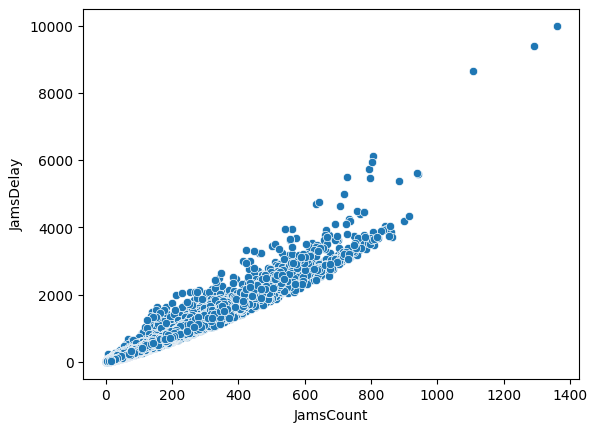

In [54]:
sns.scatterplot(df,x="JamsCount",y="JamsDelay")
plt.show()



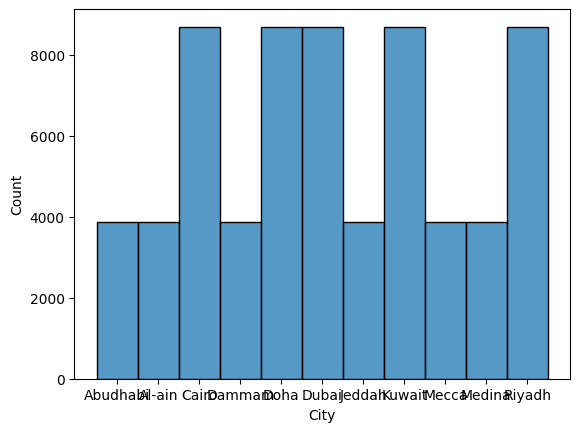

In [72]:
sns.histplot(df, x='City')
plt.show()

## 3. Insights and Conclusions

* <h3>Summarize the key insights gained from the data analysis.<h3/>
* <h3>Draw conclusions based on the patterns observed in the data.<h3/>

In [ ]:
# After analyzing the data, now we conclude:
# - How many traffics in each city.
# - Average traffics jamming time.
# - Length of each traffic.
# - how well did the traffic get busy over time.
# These are pretty good informations but, there is data that would make this dataset more useful such as:
# - Average CarCount on traffic.
# - Road name.
# with these two features along with Jamming length we know is this road for trucks or normal cars ?
# Therefore, we can come up with a solution to reduce the traffic Time